<a href="https://colab.research.google.com/github/imomchaubey/pyhon_assignment89/blob/main/assignmnet_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform staƟsƟcal analysis, and generate visual insights to help the
business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the quesƟons step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
 Well-documented code and clear comments.
 Markdown explanaƟons for each step.
 Screenshots of the plots and outputs.

   OrderID  ProductID  Quantity      Price  OrderDate       Total
0        1         35         6  43.625842 2022-01-01  261.755050
1        2         38         7  47.268262 2022-01-02  330.877835
2        3         30         6  64.351651 2022-01-03  386.109906
3        4          2         7  70.457385 2022-01-04  493.201698
4        5         37         2  85.497913 2022-01-05  170.995826
OrderID      0
ProductID    0
Quantity     0
Price        0
OrderDate    0
Total        0
dtype: int64
   OrderID  ProductID  Quantity      Price  OrderDate       Total
0        1         35         6  43.625842 2022-01-01  261.755050
1        2         38         7  47.268262 2022-01-02  330.877835
2        3         30         6  64.351651 2022-01-03  386.109906
3        4          2         7  70.457385 2022-01-04  493.201698
4        5         37         2  85.497913 2022-01-05  170.995826
          OrderID   ProductID    Quantity       Price            OrderDate  \
count  100.000000  100.0000

<ipython-input-1-1fda1405d851>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_data.fillna(method='ffill', inplace=True)


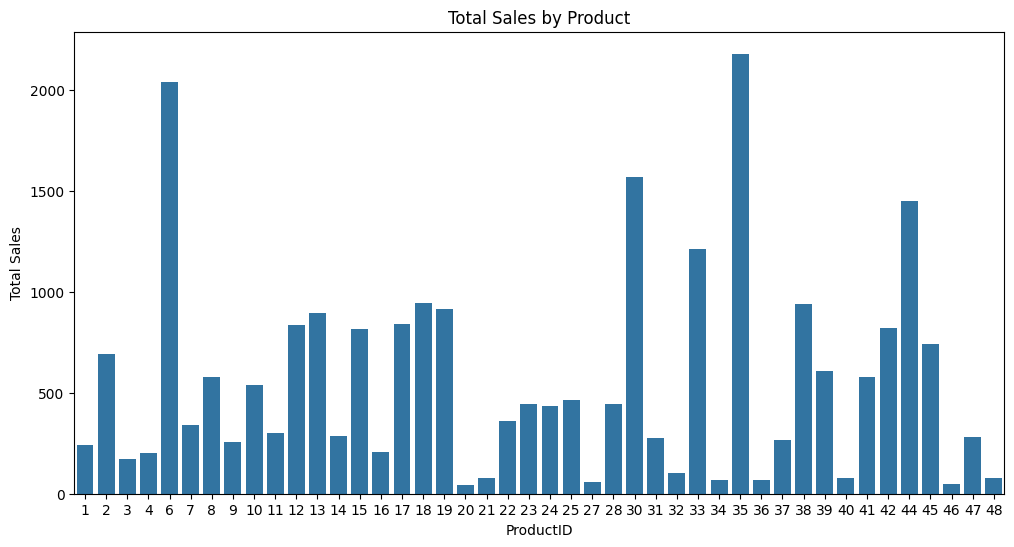

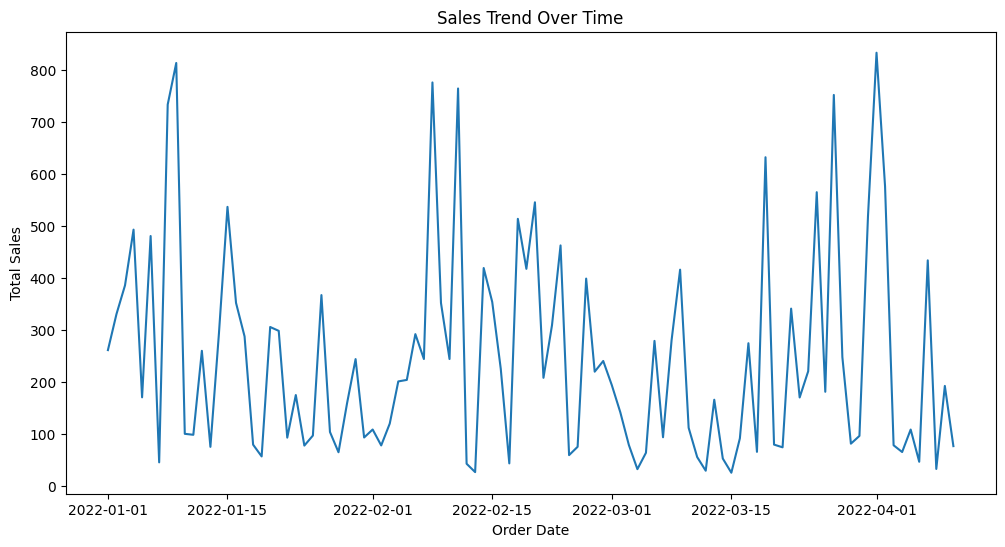

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

roll_number = 12345  # Replace with your actual roll number
np.random.seed(roll_number)

data = {
    'OrderID': np.arange(1, 101),
    'ProductID': np.random.randint(1, 50, 100),
    'Quantity': np.random.randint(1, 10, 100),
    'Price': np.random.uniform(10, 100, 100),
    'OrderDate': pd.date_range(start='2022-01-01', periods=100, freq='D')
}

sales_data = pd.DataFrame(data)
sales_data['Total'] = sales_data['Quantity'] * sales_data['Price']

print(sales_data.head())

print(sales_data.isnull().sum())

sales_data.fillna(method='ffill', inplace=True)

sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'])

print(sales_data.head())

stats = sales_data.describe()
print(stats)

total_sales_by_product = sales_data.groupby('ProductID')['Total'].sum().sort_values(ascending=False)
print(total_sales_by_product)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_product.index, y=total_sales_by_product.values)
plt.title('Total Sales by Product')
plt.xlabel('ProductID')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='OrderDate', y='Total', data=sales_data)
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()


Part I: Randomized Sales Data GeneraƟon (NumPy)
1. IniƟalize Random Seed
2. Generate Sales Data
 Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
 Electronics, Clothing, Home & Kitchen, Sports.
 Sales values should be between 1000 and 5000 units per month.
 The range should be randomized using the seed.
3. Convert to DataFrame
 Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to Dec

In [2]:
import numpy as np
import pandas as pd

roll_number = 12345  # Replace with your actual roll number
np.random.seed(roll_number)

sales_data = np.random.randint(1000, 5000, size=(12, 4))

columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_df = pd.DataFrame(sales_data, columns=columns, index=index)

print(sales_df)


     Electronics  Clothing  Home & Kitchen  Sports
Jan         1482      4557            4357    3177
Feb         4492      4497            1382    4429
Mar         1546      4613            3817    4190
Apr         4441      4387            3702    3153
May         4163      3807            2398    4280
Jun         1882      1713            1267    4149
Jul         2674      1081            2746    3214
Aug         3311      1043            1231    1023
Sep         2053      4000            4511    2311
Oct         1701      1353            2883    1855
Nov         3084      3624            1387    3812
Dec         2148      2669            4215    1631


Part II: Data ManipulaƟon and Analysis (Pandas)
1. Display the first 5 rows and summary staƟsƟcs of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecuƟve months for each category.
4. Add the following columns to the DataFrame:
 Total Sales: Sum of all categories per month.
 Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
 If your roll number is even, apply a 10% discount to the Electronics category.
 If odd, apply a 15% discount to the Clothing category.


In [3]:
import numpy as np
import pandas as pd

# Initialize Random Seed
roll_number = 12345  # Replace with your actual roll number
np.random.seed(roll_number)

# Generate Sales Data
sales_data = np.random.randint(1000, 5000, size=(12, 4))
columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_df = pd.DataFrame(sales_data, columns=columns, index=index)

# Display the first 5 rows and summary statistics of the DataFrame
print(sales_df.head())
print(sales_df.describe())

# Calculate the total sales per category and total sales per month
total_sales_per_category = sales_df.sum(axis=0)
total_sales_per_month = sales_df.sum(axis=1)
print(total_sales_per_category)
print(total_sales_per_month)

# Calculate the average sales growth between consecutive months for each category
avg_sales_growth = sales_df.pct_change().mean()
print(avg_sales_growth)

# Add Total Sales and Growth Rate columns
sales_df['Total Sales'] = sales_df.sum(axis=1)
sales_df['Growth Rate'] = sales_df['Total Sales'].pct_change() * 100

# Apply a randomized discount based on roll number
if roll_number % 2 == 0:
    sales_df['Electronics'] *= 0.90  # Apply a 10% discount to Electronics
else:
    sales_df['Clothing'] *= 0.85  # Apply a 15% discount to Clothing

print(sales_df)


     Electronics  Clothing  Home & Kitchen  Sports
Jan         1482      4557            4357    3177
Feb         4492      4497            1382    4429
Mar         1546      4613            3817    4190
Apr         4441      4387            3702    3153
May         4163      3807            2398    4280
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   2748.083333  3112.000000     2824.666667  3102.000000
std    1131.455254  1448.254184     1285.766085  1152.870252
min    1482.000000  1043.000000     1231.000000  1023.000000
25%    1836.750000  1623.000000     1385.750000  2197.000000
50%    2411.000000  3715.500000     2814.500000  3195.500000
75%    3524.000000  4414.500000     3916.500000  4159.250000
max    4492.000000  4613.000000     4511.000000  4429.000000
Electronics       32977
Clothing          37344
Home & Kitchen    33896
Sports            37224
dtype: int64
Jan    13573
Feb    14800
Mar    141

Part III: VisualizaƟons (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
 Box plots to show the sales distribuƟon for each category.


     Electronics  Clothing  Home & Kitchen  Sports
Jan         1482      4557            4357    3177
Feb         4492      4497            1382    4429
Mar         1546      4613            3817    4190
Apr         4441      4387            3702    3153
May         4163      3807            2398    4280
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   2748.083333  3112.000000     2824.666667  3102.000000
std    1131.455254  1448.254184     1285.766085  1152.870252
min    1482.000000  1043.000000     1231.000000  1023.000000
25%    1836.750000  1623.000000     1385.750000  2197.000000
50%    2411.000000  3715.500000     2814.500000  3195.500000
75%    3524.000000  4414.500000     3916.500000  4159.250000
max    4492.000000  4613.000000     4511.000000  4429.000000
Electronics       32977
Clothing          37344
Home & Kitchen    33896
Sports            37224
dtype: int64
Jan    13573
Feb    14800
Mar    141

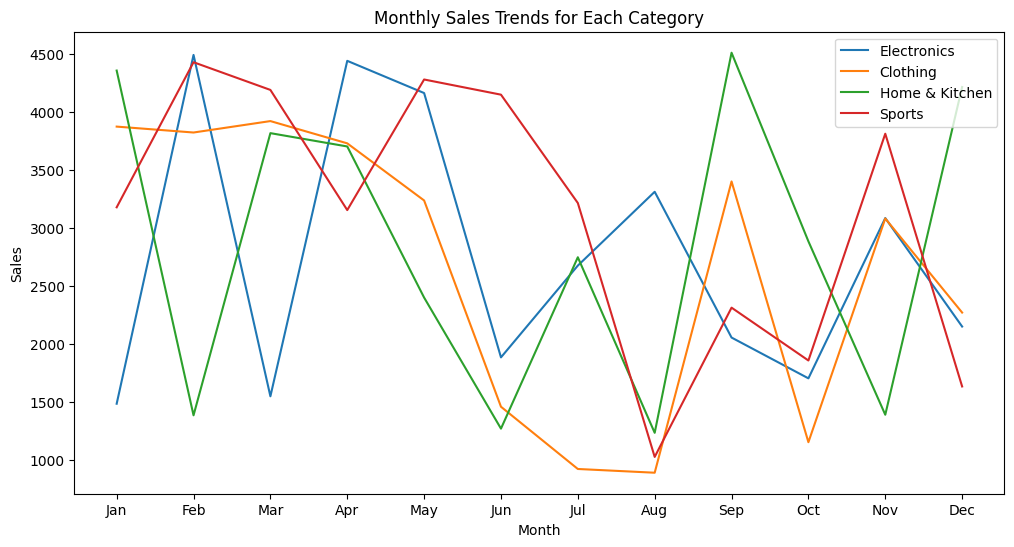

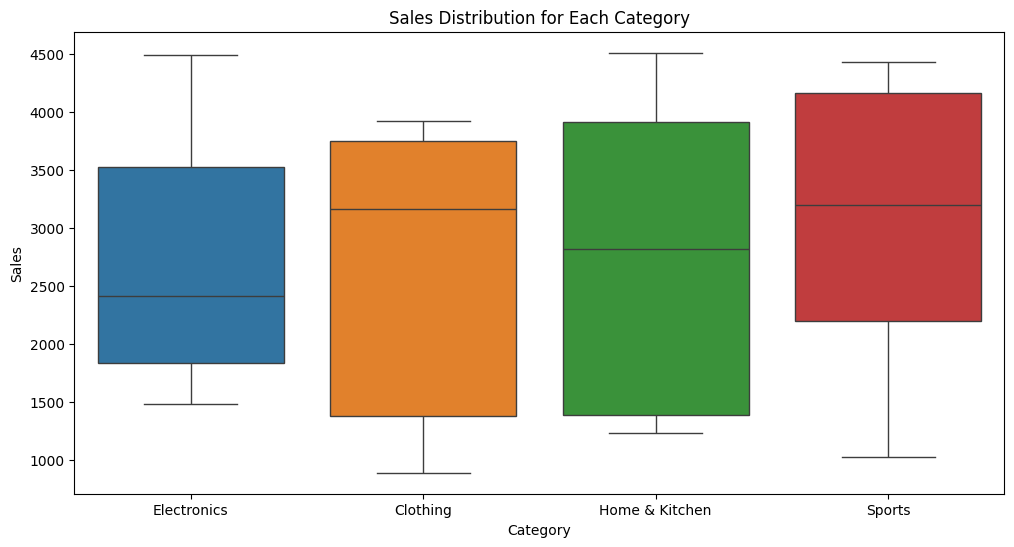

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Random Seed
roll_number = 12345  # Replace with your actual roll number
np.random.seed(roll_number)

# Generate Sales Data
sales_data = np.random.randint(1000, 5000, size=(12, 4))
columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_df = pd.DataFrame(sales_data, columns=columns, index=index)

# Display the first 5 rows and summary statistics of the DataFrame
print(sales_df.head())
print(sales_df.describe())

# Calculate the total sales per category and total sales per month
total_sales_per_category = sales_df.sum(axis=0)
total_sales_per_month = sales_df.sum(axis=1)
print(total_sales_per_category)
print(total_sales_per_month)

# Calculate the average sales growth between consecutive months for each category
avg_sales_growth = sales_df.pct_change().mean()
print(avg_sales_growth)

# Add Total Sales and Growth Rate columns
sales_df['Total Sales'] = sales_df.sum(axis=1)
sales_df['Growth Rate'] = sales_df['Total Sales'].pct_change() * 100

# Apply a randomized discount based on roll number
if roll_number % 2 == 0:
    sales_df['Electronics'] *= 0.90  # Apply a 10% discount to Electronics
else:
    sales_df['Clothing'] *= 0.85  # Apply a 15% discount to Clothing

print(sales_df)

# Visualizations
# Plot monthly sales trends for each category
plt.figure(figsize=(12, 6))
for category in columns:
    sns.lineplot(data=sales_df[category], label=category)
plt.title('Monthly Sales Trends for Each Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Box plots to show the sales distribution for each category
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_df[columns])
plt.title('Sales Distribution for Each Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
 i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each
row.
iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and
each row


In [5]:
import numpy as np

# Given array
array = np.array([[1, -2, 3], [-4, 5, -6]])

# i. Find element-wise absolute value
abs_array = np.abs(array)
print("Element-wise absolute value:\n", abs_array)

# ii. Find the 25th, 50th, and 75th percentile of flattened array, for each column, and for each row
flattened_array = array.flatten()
percentiles_flattened = np.percentile(flattened_array, [25, 50, 75])
percentiles_columns = np.percentile(array, [25, 50, 75], axis=0)
percentiles_rows = np.percentile(array, [25, 50, 75], axis=1)

print("\n25th, 50th, and 75th percentiles of flattened array:\n", percentiles_flattened)
print("\n25th, 50th, and 75th percentiles for each column:\n", percentiles_columns)
print("\n25th, 50th, and 75th percentiles for each row:\n", percentiles_rows)

# iii. Mean, Median, and Standard Deviation of flattened array, of each column, and each row
mean_flattened = np.mean(flattened_array)
median_flattened = np.median(flattened_array)
std_flattened = np.std(flattened_array)

mean_columns = np.mean(array, axis=0)
median_columns = np.median(array, axis=0)
std_columns = np.std(array, axis=0)

mean_rows = np.mean(array, axis=1)
median_rows = np.median(array, axis=1)
std_rows = np.std(array, axis=1)

print("\nMean, Median, and Standard Deviation of flattened array:")
print("Mean:", mean_flattened)
print("Median:", median_flattened)
print("Standard Deviation:", std_flattened)

print("\nMean, Median, and Standard Deviation for each column:")
print("Mean:", mean_columns)
print("Median:", median_columns)
print("Standard Deviation:", std_columns)

print("\nMean, Median, and Standard Deviation for each row:")
print("Mean:", mean_rows)
print("Median:", median_rows)
print("Standard Deviation:", std_rows)


Element-wise absolute value:
 [[1 2 3]
 [4 5 6]]

25th, 50th, and 75th percentiles of flattened array:
 [-3.5 -0.5  2.5]

25th, 50th, and 75th percentiles for each column:
 [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]

25th, 50th, and 75th percentiles for each row:
 [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]

Mean, Median, and Standard Deviation of flattened array:
Mean: -0.5
Median: -0.5
Standard Deviation: 3.8622100754188224

Mean, Median, and Standard Deviation for each column:
Mean: [-1.5  1.5 -1.5]
Median: [-1.5  1.5 -1.5]
Standard Deviation: [2.5 3.5 4.5]

Mean, Median, and Standard Deviation for each row:
Mean: [ 0.66666667 -1.66666667]
Median: [ 1. -4.]
Standard Deviation: [2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
 i. Find floor, ceiling and truncated value, rounded values

In [6]:
import numpy as np

# Given array
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

# Find floor values
floor_values = np.floor(a)
print("Floor values:", floor_values)

# Find ceiling values
ceiling_values = np.ceil(a)
print("Ceiling values:", ceiling_values)

# Find truncated values
truncated_values = np.trunc(a)
print("Truncated values:", truncated_values)

# Find rounded values
rounded_values = np.round(a)
print("Rounded values:", rounded_values)


Floor values: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling values: [-1. -1. -0.  1.  2.  2.  3.]
Truncated values: [-1. -1. -0.  0.  1.  1.  3.]
Rounded values: [-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [7]:
# Function to swap two elements in a list using a temporary variable
def swap_elements(lst, index1, index2):
    # Using a temporary variable to swap the elements
    temp = lst[index1]
    lst[index1] = lst[index2]
    lst[index2] = temp

# Example list
my_list = [1, 2, 3, 4, 5]

# Indices of elements to swap
index1 = 1
index2 = 3

# Swap the elements
swap_elements(my_list, index1, index2)

# Display the list after swapping
print("List after swapping elements at indices", index1, "and", index2, ":", my_list)


List after swapping elements at indices 1 and 3 : [1, 4, 3, 2, 5]


Q.5 Write a Python program to swap two elements in a set by converƟng it to a list first.

In [8]:
# Function to swap two elements in a set by converting it to a list
def swap_elements_in_set(s, elem1, elem2):
    # Convert the set to a list
    lst = list(s)

    # Find the indices of the elements to be swapped
    index1 = lst.index(elem1)
    index2 = lst.index(elem2)

    # Swap the elements using a temporary variable
    temp = lst[index1]
    lst[index1] = lst[index2]
    lst[index2] = temp

    # Convert the list back to a set
    swapped_set = set(lst)

    return swapped_set

# Example set
my_set = {1, 2, 3, 4, 5}

# Elements to swap
elem1 = 2
elem2 = 4

# Swap the elements in the set
swapped_set = swap_elements_in_set(my_set, elem1, elem2)

# Display the set after swapping
print("Set after swapping elements", elem1, "and", elem2, ":", swapped_set)


Set after swapping elements 2 and 4 : {1, 2, 3, 4, 5}
